In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime
from scipy import stats

df = pd.read_csv('datasets/dataset_mood_smartphone.csv', index_col=0)

df


,id,time,variable,value
1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 3: Implement Imputation Methods
def knn_impute(data):
    imputer = KNNImputer(n_neighbors=3)
    imputed_data = imputer.fit_transform(data[['value']])
    data['Value_KNN'] = imputed_data

def locf_impute(data):
    data['Value_LOCF'] = data['value'].fillna(method='ffill')

def focb_impute(data):
    data['Value_FOCB'] = data['value'].fillna(method='bfill')

def mean_impute(data):
    mean_value = data['value'].mean()
    data['Value_Mean'] = data['value'].fillna(mean_value)

def median_impute(data):
    median_value = data['value'].median()
    data['Value_Median'] = data['value'].fillna(median_value)

def rolling_mean_impute(data, window_size):
    data['Value_Rolling_Mean'] = data['value'].rolling(window=window_size, min_periods=1).mean()

def rolling_median_impute(data, window_size):
    data['Value_Rolling_Median'] = data['value'].rolling(window=window_size, min_periods=1).median()

# Step 4: Calculate Performance Metrics
def calculate_metrics(true_values, imputed_values):
    mse = mean_squared_error(true_values, imputed_values)
    mae = mean_absolute_error(true_values, imputed_values)
    return mse, mae

# Load your time series data
data = pd.read_csv('./datasets/dataset_mood_smartphone.csv')
data = data[(data['variable'] == 'circumplex.valence') | (data['variable'] == 'circumplex.arousal')].dropna().sort_values(by = ['id', 'variable', 'time'])

# Choose a percentage of values to randomly remove
missing_percentage = 0.05  # for example, 20%

# Randomly select indices to set as missing values
np.random.seed(42)  # for reproducibility
missing_indices = np.random.choice(data.index, size=int(len(data) * missing_percentage), replace=False)

# Create a copy of the original data to work with
data_missing = data.copy()

# Set selected indices to NaN
data_missing.loc[missing_indices, 'value'] = np.nan

# Apply imputation methods to the dataset with missing values
knn_impute(data_missing)
locf_impute(data_missing)
focb_impute(data_missing)
mean_impute(data_missing)
median_impute(data_missing)
rolling_mean_impute(data_missing, window_size=5)  # Adjust window size as needed
rolling_median_impute(data_missing, window_size=5)  # Adjust window size as needed

# Calculate performance metrics (MSE and MAE) for each imputation method
true_values = data['value']  # Original values from the complete dataset

imputed_values_knn = data_missing['Value_KNN']
imputed_values_locf = data_missing['Value_LOCF']
imputed_values_focb = data_missing['Value_FOCB']
imputed_values_mean = data_missing['Value_Mean']
imputed_values_median = data_missing['Value_Median']
imputed_values_rolling_mean = data_missing['Value_Rolling_Mean']
imputed_values_rolling_median = data_missing['Value_Rolling_Median']

mse_knn, mae_knn = calculate_metrics(true_values, imputed_values_knn)
mse_locf, mae_locf = calculate_metrics(true_values, imputed_values_locf)
mse_focb, mae_focb = calculate_metrics(true_values, imputed_values_focb)
mse_mean, mae_mean = calculate_metrics(true_values, imputed_values_mean)
mse_median, mae_median = calculate_metrics(true_values, imputed_values_median)
mse_rolling_mean, mae_rolling_mean = calculate_metrics(true_values, imputed_values_rolling_mean)
mse_rolling_median, mae_rolling_median = calculate_metrics(true_values, imputed_values_rolling_median)

# Print or visualize performance metrics
print("Performance Metrics:")
print("KNN - MSE:", mse_knn, "MAE:", mae_knn)
print("LOCF - MSE:", mse_locf, "MAE:", mae_locf)
print("FOCB - MSE:", mse_focb, "MAE:", mae_focb)
print("Mean - MSE:", mse_mean, "MAE:", mae_mean)
print("Median - MSE:", mse_median, "MAE:", mae_median)
print("Rolling Mean - MSE:", mse_rolling_mean, "MAE:", mae_rolling_mean)
print("Rolling Median - MSE:", mse_rolling_median, "MAE:", mae_rolling_median)


Performance Metrics:
KNN - MSE: 0.04718126433251966 MAE: 0.041947205883209736
LOCF - MSE: 0.06017683146878383 MAE: 0.03581739444243955
FOCB - MSE: 0.058913749548899316 MAE: 0.03563695416817034
Mean - MSE: 0.04718126433251966 MAE: 0.041947205883209736
Median - MSE: 0.07271743053049441 MAE: 0.0395164200649585
Rolling Mean - MSE: 0.5304193732707808 MAE: 0.5298388066883195
Rolling Median - MSE: 0.6555620714543486 MAE: 0.45818296643810896


/var/folders/2p/lk_7jyfx52g86tz59mc412p80000gn/T/ipykernel_30543/2724374530.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Value_LOCF'] = data['value'].fillna(method='ffill')
/var/folders/2p/lk_7jyfx52g86tz59mc412p80000gn/T/ipykernel_30543/2724374530.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Value_FOCB'] = data['value'].fillna(method='bfill')


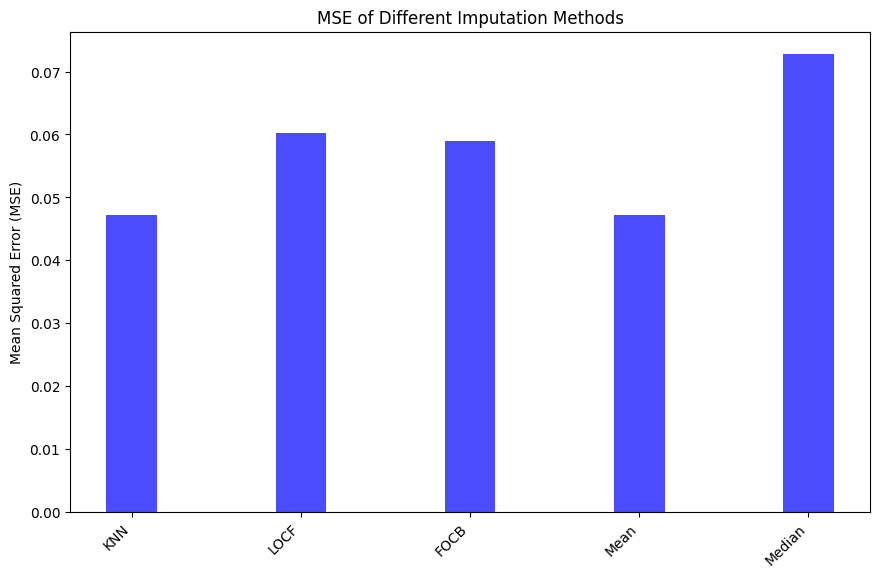

In [4]:
import matplotlib.pyplot as plt

# List of imputation methods and their MSE values
methods = ['KNN', 'LOCF', 'FOCB', 'Mean', 'Median']
mse_values = [mse_knn, mse_locf, mse_focb, mse_mean, mse_median]
# Define the number of methods and their positions
num_methods = len(methods)
method_positions = range(num_methods)

# Plotting the MSE values with narrow bars and closer spacing
plt.figure(figsize=(10, 6))
bar_width = 0.3  # Adjust the width of the bars
bar_spacing = 0  # Adjust the spacing between the bars
for i in method_positions:
    plt.bar(method_positions[i], mse_values[i], color='blue', alpha=0.7, width=bar_width, label=methods[i])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE of Different Imputation Methods')
plt.xticks(method_positions, methods, rotation=45, ha='right')
plt.tight_layout()

# Adjust the spacing between bars
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()